# **📊 Financial Analysis of Goldman Sachs (GS)**

This notebook is part of the DAB401 – Financial Analytics final group project.
It includes technical analysis and forecasting models applied to Goldman Sachs (Ticker: GS)
as part of a broader evaluation of the company's financial health and investment potential.

**Group 6 – Team Members:**
- Harish Kumar D – W0850003
- Sabiha Begum Mohammed – W0836731
- Sarath Krishna Marath – W0832604
- Nil Kumar G. Patel – W0837725
- Shreya Thakkar – W0837465

The notebook covers:
- Historical stock price visualization
- Moving average analysis (SMA & EMA)
- Trading signals using crossover strategy
- Monte Carlo simulation for 30-day price forecast
- Facebook Prophet forecasting model

#### **1. Installation and Imports**

In this section, we install the required libraries and import essential Python modules to fetch stock data and perform analysis on Goldman Sachs (GS) stock.

Libraries used:
- `yfinance` for data collection from Yahoo Finance
- `matplotlib` and `pandas` for data visualization and handling
- `numpy` for calculations
- `warnings` to suppress unnecessary output

In [17]:
# Install required packages
!pip install yfinance
!pip install tabulate
!pip install prophet

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

#### **2. Data Fetching**

We will fetch historical daily closing prices for Goldman Sachs (ticker: GS) from Yahoo Finance.  
The selected date range is from **January 18, 2022 to March 19, 2025**, as required for the project analysis.

In [18]:
# Define stock ticker and date range
ticker = "GS"
start_date = "2022-01-18"
end_date = "2025-03-19"

# Fetch stock data from Yahoo Finance
df = yf.download(ticker, start=start_date, end=end_date)[["Close"]]

# Rename column for clarity
df.rename(columns={"Close": "Close Price"}, inplace=True)

# Display the first 10 rows
df.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close Price
Ticker,GS
Date,
2022-01-18,325.154938
2022-01-19,318.659149
2022-01-20,319.374817
2022-01-21,315.530487
2022-01-24,315.053467
2022-01-25,313.365295
2022-01-26,314.402039
2022-01-27,312.888184


#### **3. Visualizing the Closing Prices**

We now plot the historical closing prices of Goldman Sachs from January 2022 to March 2025.  
This helps us understand the overall price movement and identify long-term trends visually.

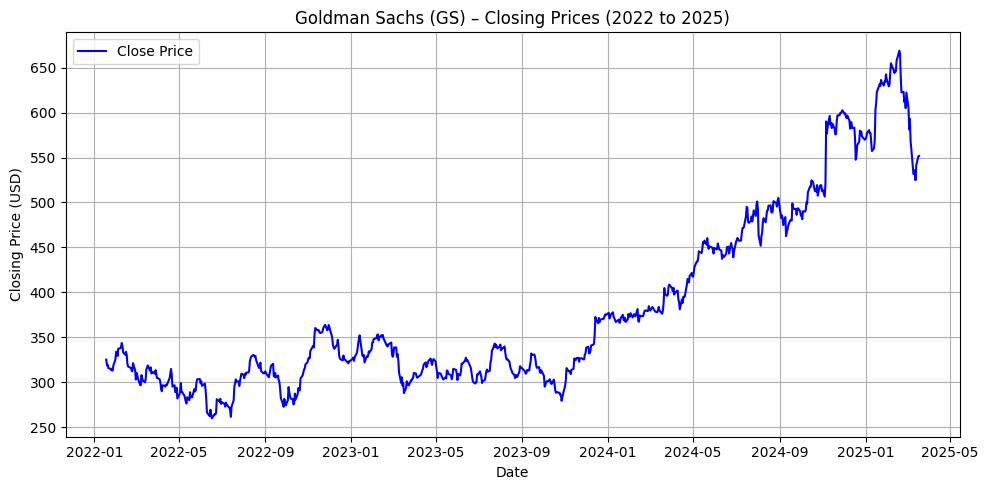

In [19]:
# Plot the closing prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close Price'], label='Close Price', color='blue')
plt.title('Goldman Sachs (GS) – Closing Prices (2022 to 2025)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights: Closing Price Trend**

- **📈 Uptrend:** Goldman Sachs (GS) stock shows a strong upward movement, especially from mid-2023 to early 2025.
- **📉 Volatility:** Sharp dips are visible after certain peaks, indicating price corrections or market reactions.
- **✅ Overall Growth:** The price has nearly doubled from early 2022, reflecting positive investor sentiment and company performance.

#### **4. Simple Moving Average (SMA) Analysis**

To identify short- and long-term trends in the stock price of Goldman Sachs (GS), we calculate:

- **SMA 20**: The average closing price over the last 20 trading days.
- **SMA 50**: The average closing price over the last 50 trading days.

These indicators help spot potential buy/sell signals and overall trend direction.

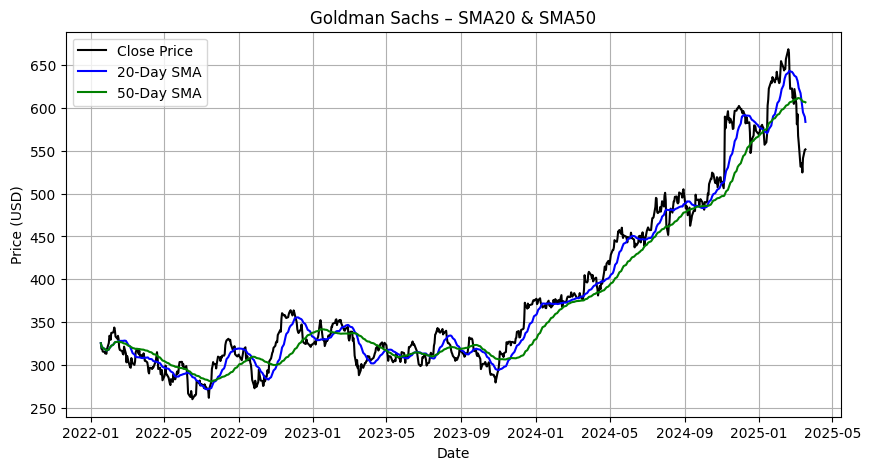

In [20]:
# Calculate 20 and 50-day Simple Moving Averages
df['SMA20'] = df['Close Price'].rolling(window=20, min_periods=1).mean()
df['SMA50'] = df['Close Price'].rolling(window=50, min_periods=1).mean()

# Plot the SMAs along with close price
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close Price'], label='Close Price', color='black')
plt.plot(df.index, df['SMA20'], label='20-Day SMA', color='blue')
plt.plot(df.index, df['SMA50'], label='50-Day SMA', color='green')
plt.title('Goldman Sachs – SMA20 & SMA50')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

#### **5. SMA Trading Signal Analysis**

This section generates buy and sell signals based on the crossover strategy:
- A **Buy Signal (🔼)** is triggered when the 20-day SMA crosses above the 50-day SMA.
- A **Sell Signal (🔽)** is triggered when the 20-day SMA crosses below the 50-day SMA.

These signals help identify potential entry and exit points in the market.

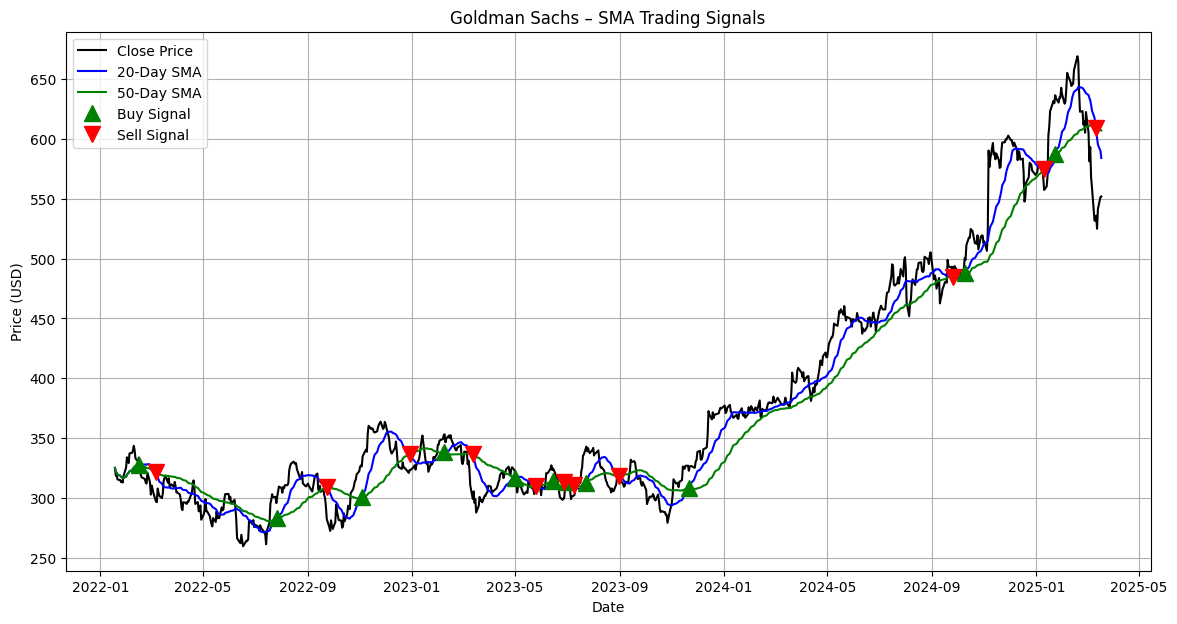

In [21]:
# Generate trading signals
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()

# Plot with buy/sell markers
plt.figure(figsize=(14, 7))
plt.plot(df['Close Price'], color='k', label='Close Price')
plt.plot(df['SMA20'], color='b', label='20-Day SMA')
plt.plot(df['SMA50'], color='g', label='50-Day SMA')

# Buy signals
plt.plot(df[df['Position'] == 1].index,
         df['SMA20'][df['Position'] == 1],
         '^', markersize=12, color='g', label='Buy Signal')

# Sell signals
plt.plot(df[df['Position'] == -1].index,
         df['SMA50'][df['Position'] == -1],
         'v', markersize=12, color='r', label='Sell Signal')

plt.title('Goldman Sachs – SMA Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

**SMA-Based Trading Signal Insights**

This chart shows trading signals using 20-day and 50-day Simple Moving Averages (SMA):

- **Buy Signals (Green Triangles)** appear when the 20-day SMA crosses above the 50-day SMA. This often signals upward momentum and a potential **buy opportunity**.
- **Sell Signals (Red Triangles)** occur when the 20-day SMA drops below the 50-day SMA. This may indicate a trend reversal or weakness, suggesting a **good time to sell**.

**Observation**:  
Most buy signals appeared before major upward trends in Goldman Sachs stock, especially in 2024, confirming the SMA crossover method is a strong early indicator in this case.

#### **6. Exponential Moving Averages (EMA20 & EMA50)**

Now we’ll analyze the Exponential Moving Averages (EMA), which give more weight to recent prices and react faster to market changes compared to SMA.

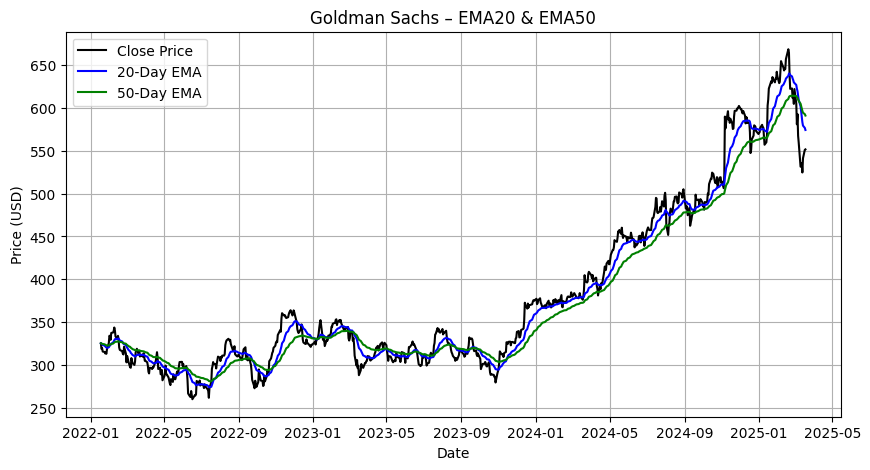

In [22]:
# Calculate EMA20 and EMA50
df['EMA20'] = df['Close Price'].ewm(span=20, adjust=False).mean()
df['EMA50'] = df['Close Price'].ewm(span=50, adjust=False).mean()

# Plot EMA chart
plt.figure(figsize=(10, 5))
plt.plot(df['Close Price'], label='Close Price', color='black')
plt.plot(df['EMA20'], label='20-Day EMA', color='blue')
plt.plot(df['EMA50'], label='50-Day EMA', color='green')
plt.title('Goldman Sachs – EMA20 & EMA50')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

#### **7. Exponential Moving Average (EMA) Trading Signals**

In this section, we identify buy and sell signals using Exponential Moving Averages:
- **Buy Signal**: When the 20-day EMA crosses **above** the 50-day EMA.
- **Sell Signal**: When the 20-day EMA crosses **below** the 50-day EMA.

These signals help investors make timely decisions based on recent stock price momentum.

<Figure size 1400x700 with 0 Axes>

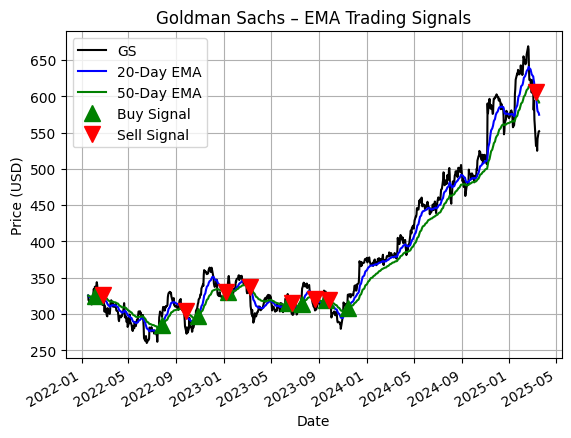

In [23]:
# Generate EMA trading signals
df['EMA_Signal'] = 0.0
df['EMA_Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)
df['EMA_Position'] = df['EMA_Signal'].diff()

# Plotting
plt.figure(figsize=(14, 7))
df['Close Price'].plot(color='black', label='Close Price')
df['EMA20'].plot(color='blue', label='20-Day EMA')
df['EMA50'].plot(color='green', label='50-Day EMA')

# Buy signals
plt.plot(df[df['EMA_Position'] == 1].index,
         df['EMA20'][df['EMA_Position'] == 1],
         '^', markersize=12, color='green', label='Buy Signal')

# Sell signals
plt.plot(df[df['EMA_Position'] == -1].index,
         df['EMA50'][df['EMA_Position'] == -1],
         'v', markersize=12, color='red', label='Sell Signal')

plt.title("Goldman Sachs – EMA Trading Signals")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

**EMA Signals – Quick Insights**

- **Buy Moments**: When EMA20 crosses above EMA50, the stock usually moves upward.
- **Sell Moments**: When EMA20 drops below EMA50, a downward trend often follows.
- **Trend**: From mid-2023 onwards, most signals show upward momentum.
- **Effectiveness**: EMA signals react faster to price changes than SMA, giving quicker entry/exit points.

#### **8. Rolling Mean and Standard Deviation**

To better understand how the stock price fluctuates over time, we calculate the **rolling mean** (moving average) and **rolling standard deviation**. These help assess **trends** and **volatility**.

A 15-day window is used to smooth the price and highlight patterns.

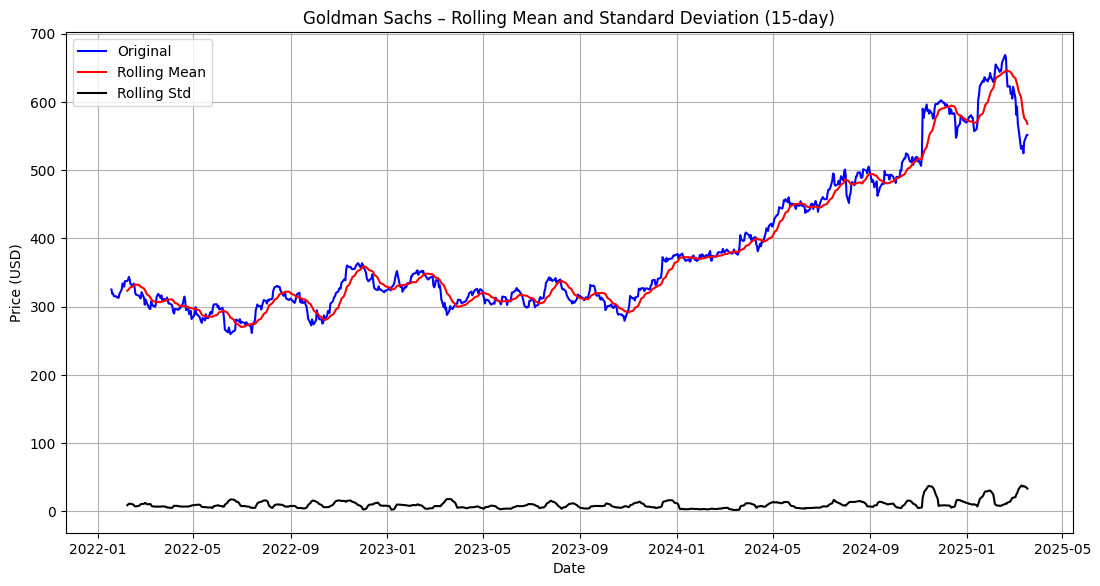

In [24]:
# Calculate rolling mean and standard deviation over a 15-day window
rolling_mean = df['Close Price'].rolling(window=15).mean()
rolling_std = df['Close Price'].rolling(window=15).std()

# Plot original price, rolling mean and rolling std
plt.figure(figsize=(13, 6.5))
plt.plot(df['Close Price'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Goldman Sachs – Rolling Mean and Standard Deviation (15-day)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

**Key Observations:**
- From 2022 to late 2023, the price remained relatively stable with small deviations.
- A strong uptrend begins in early 2024, with the rolling mean following closely—showing consistent growth.
- The rolling standard deviation spiked during early 2025, indicating higher volatility, possibly due to market uncertainty or profit booking.

#### **9. Monte Carlo Simulation for Stock Price Forecasting**
Monte Carlo Simulation helps estimate the future stock prices based on random sampling. It’s widely used in finance for risk assessment and price prediction.

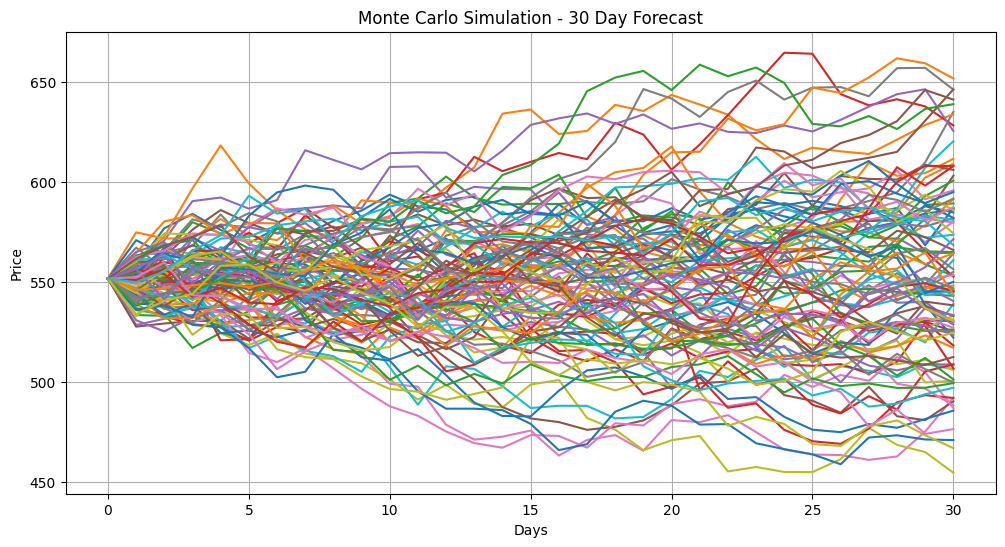

In [25]:
import numpy as np

# Parameters for simulation
last_price = df['Close Price'].iloc[-1]
num_simulations = 100
num_days = 30
returns = df['Close Price'].pct_change().dropna()
mean_return = returns.mean()
std_dev = returns.std()

simulation_df = pd.DataFrame()

for i in range(num_simulations):
    price_series = [last_price]
    for _ in range(num_days):
        shock = np.random.normal(loc=mean_return, scale=std_dev)
        price = price_series[-1] * (1 + shock)
        price_series.append(price)
    simulation_df[i] = price_series

# Plotting
plt.figure(figsize=(12,6))
plt.plot(simulation_df)
plt.title("Monte Carlo Simulation - 30 Day Forecast")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()

The Monte Carlo simulation shows the possible future price paths of Goldman Sachs stock over the next 30 days.

- **Most paths cluster** between \$520 and \$590, suggesting likely short-term price stability.
- A few paths move above **\$650** or drop below **$480**, indicating potential volatility.
- Overall, the simulation reflects **moderate risk** with more scenarios pointing to **sideways or upward movement**, making GS stock relatively stable in the short term.

**10. Forecasting with Facebook Prophet**

In this section, we'll use the **Facebook Prophet** library to forecast the future closing prices of Goldman Sachs (GS) stock based on historical data.

We’ll:
- Prepare the data in Prophet format (`ds` and `y` columns),
- Train the Prophet model,
- Forecast the next 30 days,
- Visualize the predicted trends.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnt51feil/lez5nyow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnt51feil/yn31dkpo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23408', 'data', 'file=/tmp/tmpnt51feil/lez5nyow.json', 'init=/tmp/tmpnt51feil/yn31dkpo.json', 'output', 'file=/tmp/tmpnt51feil/prophet_modelpr5as1e8/prophet_model-20250408181428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:14:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:14:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


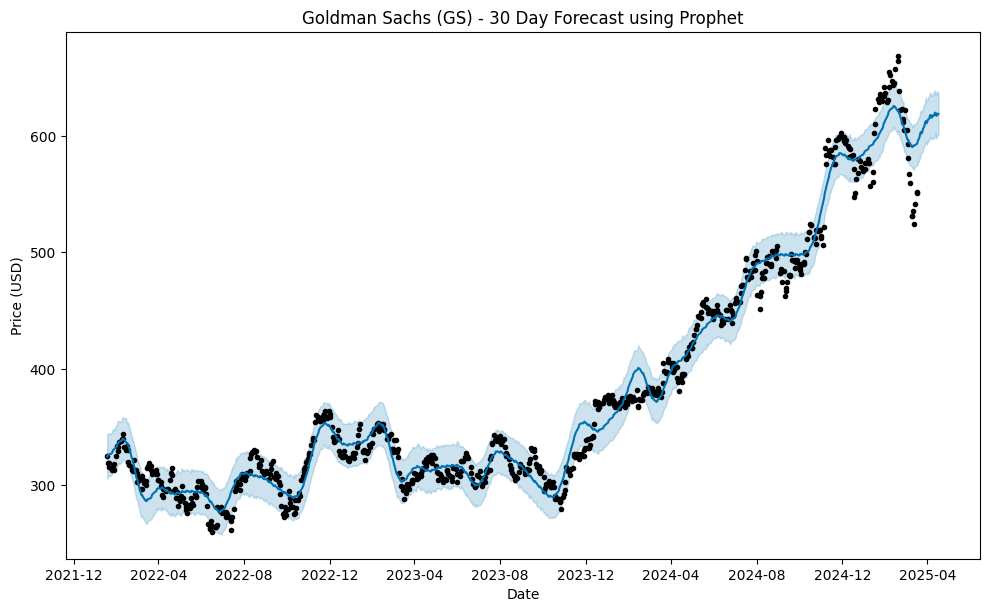

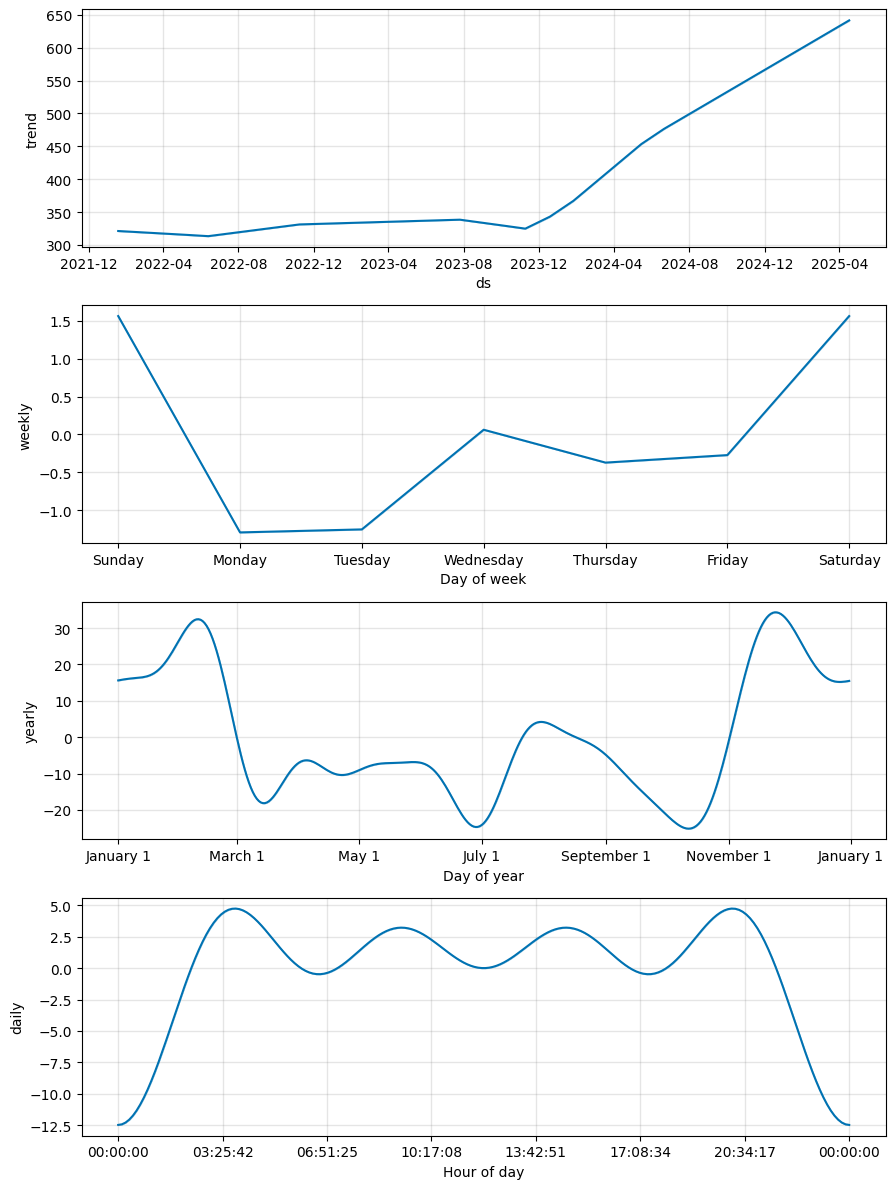

In [28]:
# Importing Prophet
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df[['Close Price']].reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet expects columns to be named 'ds' and 'y'

# Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Create future dataframe for 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title('Goldman Sachs (GS) - 30 Day Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()

# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()

**FB Prophet Forecast – Insights**

- **30-Day Prediction:** The forecast indicates a steady upward trend for Goldman Sachs' stock, suggesting positive momentum.
- **Confidence Interval:** The shaded region around the forecast line shows uncertainty; however, the overall movement is bullish.
- **Component Analysis:**
  - **Trend:** A significant upward trend is seen since early 2024.
  - **Weekly Pattern:** Stocks perform better on Sundays and Saturdays, weaker on Mondays and Tuesdays.
  - **Yearly Pattern:** March and November show strong seasonal movements, which may align with financial cycles or earnings reports.
  - **Daily Seasonality:** Hourly patterns are visible (though not usually relevant for long-term investors).

This model can help in understanding future growth and deciding entry/exit points based on time-seasonality factors.

#### **11. CAPM Supporting Data Preparation**

To support our CAPM analysis, we downloaded 10 years of historical daily data for both Goldman Sachs (GS) and the S&P 500 Index (^GSPC) from Yahoo Finance. The daily percentage returns are calculated using the “Close” prices. These values are used to compute the Beta coefficient and expected return via the CAPM model in Excel.

Two CSV files were created:

- `stock_market_returns_10yr.csv`: Contains daily percentage returns for GS and S&P 500.
- `gs_sp500_full_data_10yr.csv`: Contains full historical OHLCV data for GS and S&P 500 from 2015-04-06 to 2025-04-03.

These files serve as reference materials and offer transparency in the data used for our valuation and regression-based analysis.

In [29]:
import yfinance as yf
import pandas as pd

start_date = "2015-04-06"
end_date = "2025-04-03"

# Download stock data for Goldman Sachs (GS)
stock_data = yf.download("GS", start=start_date, end=end_date)

# Download market data for S&P 500 Index (^GSPC)
market_data = yf.download("^GSPC", start=start_date, end=end_date)

# Check if data is valid
if stock_data.empty or market_data.empty:
    print("Error: Empty DataFrame downloaded. Check ticker symbols or date range.")
else:
    if "Close" not in stock_data.columns or "Close" not in market_data.columns:
        print("Error: 'Close' column not found in downloaded data.")
    else:
        # Calculate daily returns
        stock_returns = stock_data["Close"].pct_change()
        market_returns = market_data["Close"].pct_change()

        # Combine and clean
        combined_returns = pd.concat([stock_returns, market_returns], axis=1)
        combined_returns.columns = ["GS Returns", "S&P Returns"]
        combined_returns.dropna(inplace=True)

        # Save to CSV for Beta/CAPM usage
        combined_returns.to_csv("stock_market_returns_10yr.csv")
        print("Returns data saved to stock_market_returns_10yr.csv")

        # Optional: Save full price data for appendix
        full_data = pd.concat({
            'GS': stock_data,
            'S&P500': market_data
        }, axis=1)
        full_data.to_csv("gs_sp500_full_data_10yr.csv")
        print("Full OHLCV data saved to gs_sp500_full_data_10yr.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Returns data saved to stock_market_returns_10yr.csv
Full OHLCV data saved to gs_sp500_full_data_10yr.csv
